In [1]:
def man(a,b):
    return abs(a-b)

In [2]:
import numpy as np
import math
import sys

In [3]:

def kernel(x,y):
    x = np.array(x)
    y = np.array(y)
    #print(np.linalg.norm(x-y))
    return math.exp((-np.linalg.norm(x-y)**2)/(2*1000000))

In [4]:
def computeKS(a,b,N):

    dsum = []
    x = np.arange(-5,8,0.1)
    for j in x:
        suma = sum([i < j for i in a])
        sumb = sum([i < j for i in b])
        dsum.append(abs(suma - sumb)/N)
        #print(max(dsum))
    return max(dsum)

In [5]:
# def computeMMD(x,y,N):
#     g = [[kernel(x[:,i], x[:,j]) + kernel(y[:,i],y[:,j]) - (2*kernel(x[:,i], y[:,j])) for j in range(N)] for i in range(N)]
#     #print(kernel(x[:,1], y[:,2]))
#     print('MMD function done')
#     return math.sqrt((sum(map(sum,g)) / N**2))

def computeMMD(x, y, N,i,j):
    # Convert x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    x = x[:, :N]
    y = y[:, :N]


    # Kxx = np.exp(-np.linalg.norm(x[:, :, None]-x[:, None, :], axis=0)**2/(2*1000000))
    # Kyy = np.exp(-np.linalg.norm(y[:, :, None]-y[:, None, :], axis=0)**2/(2*1000000))
    # Kxy = np.exp(-np.linalg.norm(x[:, :, None]-y[:, None, :], axis=0)**2/(2*1000000))

    
    # Compute kernel matrices using broadcasting
    # Kxx = kernel(x[:, None], x[None, :])  # Kernel matrix for x with itself
    # Kyy = kernel(y[:, None], y[None, :])  # Kernel matrix for y with itself
    # Kxy = kernel(x[:, None], y[None, :])  # Kernel matrix for x with y
    #print('MMD function done')

    # Calculate the MMD using vectorized operations
    # MMD_squared = (np.sum(Kxx) + np.sum(Kyy) - 2 * np.sum(Kxy)) / (N**2)
    MMD_squared = (np.sum(np.exp(-np.linalg.norm(x[:, :, None]-x[:, None, :], axis=0)**2/(2*1000000))) + 
                    np.sum(np.exp(-np.linalg.norm(y[:, :, None]-y[:, None, :], axis=0)**2/(2*1000000))) - 
                    2 * np.sum(np.exp(-np.linalg.norm(x[:, :, None]-y[:, None, :], axis=0)**2/(2*1000000)))) / (N**2)
    #print(f'MMD_squared = {MMD_squared}')
    MMD_squared_abs = abs(MMD_squared)
    # print(np.linalg.norm(x[:, :, None]-x[:, None, :], axis=0)**2, np.linalg.norm(y[:, :, None]-y[:, None, :], axis=0)**2, np.linalg.norm(x[:, :, None]-y[:, None, :], axis=0)**2)
    # print(i,j,MMD_squared)
    return np.sqrt(MMD_squared_abs)

In [6]:
def update(x, y, n):
    # Convert x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Calculate the last element in x and y
    xn1 = x[n-1]
    yn1 = y[n-1]

    # Compute kernels for all elements with the last element
    kernel_xn1 = kernel(x[:n], xn1)  # Kernel values between all elements in x and xn1
    kernel_yn1 = kernel(y[:n], yn1)  # Kernel values between all elements in y and yn1
    kernel_xyn1 = kernel(x[:n], yn1)  # Kernel values between all elements in x and yn1

    # Sum the results for the first part
    sum1 = np.sum(kernel_xn1 + kernel_yn1 - 2 * kernel_xyn1)

    # Compute kernels for the last element in x and y with all elements up to n-1
    kernel_xn1_m = kernel(xn1, x[:n-1])  # Kernel values between xn1 and all elements in x[:n-1]
    kernel_yn1_m = kernel(yn1, y[:n-1])  # Kernel values between yn1 and all elements in y[:n-1]
    kernel_xyn1_m = kernel(xn1, y[:n-1])  # Kernel values between xn1 and all elements in y[:n-1]

    # Sum the results for the second part
    sum2 = np.sum(kernel_xn1_m + kernel_yn1_m - 2 * kernel_xyn1_m)

    # Calculate the final result
    result = (sum1 + sum2) / (n**2)
    
    return result


In [7]:
#lst = [[0,10,6,5,9],[10,0,8,7,2],[6,8,0,1,4],[5,7,1,0,3],[9,2,4,3,0]]
import random
S = 50      # total number of sequences
M = 5      # number of sequences per cluster
K = 10      # number of clusters
means = [i for i in range(K) for j in range(M)]

correct = [[(M*i)+j for j in range(M)]for i in range(K)]
Nvec = [20, 40, 60, 80, 100, 120, 140]  # Number of elements in each stream
print(correct)

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24], [25, 26, 27, 28, 29], [30, 31, 32, 33, 34], [35, 36, 37, 38, 39], [40, 41, 42, 43, 44], [45, 46, 47, 48, 49]]


In [8]:
import pickle
with open('MNIST_50_arms_10_clusters_norm1.pkl', 'rb') as pkl_file:
    y_all = pickle.load(pkl_file)

FileNotFoundError: [Errno 2] No such file or directory: 'MNIST_50_arms_10_clusters_norm1.pkl'

In [ ]:
print(len(y_all))
print(y_all[0].shape)

50
(10, 1000)


In [ ]:
def wrong_streams_ratio(C_sort, correct, S=50):
    K = len(correct)
    # S = 50 # hard coded
    num_wrong_streams = 0
    for k in range(K):
        wrong_streams_k = np.setdiff1d(np.array(C_sort[k]), np.array(correct[k]))
        num_wrong_streams = num_wrong_streams + len(wrong_streams_k)
    return num_wrong_streams/S


In [ ]:
# correct = [[1, 2, 3], 
#            [4, 5, 6], 
#            [7, 8, 9]]

# C_sort = [[1, 2], 
#           [3, 4, 5, 6], 
#           [7, 8, 9]]

# print(wrong_clustering_ratio(C_sort, correct, 9))

In [ ]:
col_indices = np.random.choice(1000, 200, replace=False)
print(col_indices)

[468 130 222 312 808 499 927 642 955 299 153 134 885  19 183  35 553 116
 460 721 619 967 586 851 673 177 749 577 829 736  99 264 798 461 893 235
 821 661 756 592 616  71 276 879 355 709 346  38 663 203 294 209 175 770
 843 464 578 394 266 831 631 427 123 496 758 677 531 685 827 152 101 698
 855 199 928 538 193 914 794 933 269 413 587 570 251 934 459 555 473 891
 623 245 819 582 550 159 916 823 764 643  93 640 493 455 490 179   6 282
 759 939 406 303  88 833 156 834 790  77 906 902 506 925 419 607 632 452
  11 498 702 892 545 516 395 440 868 973 857 929 797  63 463 204  69 860
 989 390 725 234 837 404  85 241  22 561 361 217 669 168 480 995 218 401
 100 417  16  12  58  79 962 903 649 548 825  72  64 200 802 321 907 711
 527 726 115 393 494 338 227 540 410 371 646 884 972 558 547  76 503 676
 777 344]


In [ ]:
import math
#constvec = [1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
constvec = [170,180,190,200,210,220,230,240]
Pe = np.zeros(len(constvec))
lnPe=np.zeros(len(constvec))
expsamples=np.zeros(len(constvec))
print(Pe,lnPe,expsamples)

for ii in range(len(constvec)):
    const = constvec[ii]
    iter_sum = 0
    error = 0
    total = 0
    while error < 1:
        ##############  INITIALISATION  ################
        # cluster indices 0 to M-1 and an empty list lst

        col_indices = np.random.choice(1000, nn, replace=False)
        y = {}
        for s in range(S):
            y[s] = y_all[s][:, col_indices]

        clusters = [[i] for i in range(M)]
        lst = [[] for i in range(M)]

        # generate first 2 samples to initialize MMD estimate
        nn = 2
        # X = np.asarray([np.random.normal(means[j],1,nn) for j in range(M)])

        ####    Calculating initial MMDs between each pair of sequences    ####

        lst_dseq =np.zeros((M,M))
        for i in range(1,M):
            for j in range(i):
                lst_dseq[i][j] = computeMMD(y[i],y[j],nn)
                lst_dseq[j][i] = lst_dseq[i][j]
        #print(lst_fixed)

        ##### TEST-STATISTIC Tn INITIALISATION #####
        Tn = 0
        #print(np.min(lst_index,axis = 0))               #it will a column matrix of all 0
        #print(np.min(lst_index,axis = 1))                #it will a row matrix of all 0

        #minval = np.min(lst_fixed[np.nonzero(lst_fixed)])         #will give you the non zero min value of the matrix
        #print(minval)

        #[min_i,min_j] = np.where(lst_fixed==minval)       #will give the index of the  min value of the matrix
        #print([min_i,min_j])

        #Tn = minval    #minimum inter-cluster distance
        #print('Minimum inter-cluster distance after iteration ', nn, ':', Tn)

        while Tn < (const/(nn)):
            nn =nn + 1

            lst_dc = [[] for i in range(M)]
            lst_dc = [[lst_dseq[i][j] for j in range(i+1)] for i in range(M)]
            for i in range(M):
                for j in range(M):
                    if i<j:
                        lst_dc[i].append(lst_dc[j][i])
            #print(lst_new)
            #####
            # Code for SLINK
            clusters = [[i] for i in range(M)]
            # Merge closest clusters till number of clusters is equal to K
            while len(clusters)>K:

                ####    FIND MINIMUM    ####

                #mi = sys.float_info.max
                mi = 100
                for i in range(len(lst_dc)):
                    for j in range(i+1):
                        if i != j:
                            if lst_dc[i][j] < mi:
                                mi = lst_dc[i][j]
                                a,b = [i,j]
                #print("the values of a and b are :", a,b)
                clusters[b].extend(clusters[a])  #add the elements of a to b at the end
                del clusters[a]                   #delete cluster a
                #print(clusters)

                ####    MERGE ROWS  ####
                #print("the lst[b] is ",lst[b])
                #print("the lst[a] is ",lst[a])
                for i in range(len(lst_dc[b])):        #merge rows 'a' and 'b'
                    if min(lst_dc[a][i],lst_dc[b][i]) != 0:
                        lst_dc[b][i] = min(lst_dc[a][i],lst_dc[b][i])
                del lst_dc[a]

                ####    UPDATE ROWS     ####
                for i in range(len(lst_dc)):       #update all other rows
                    if i!=b:
                        lst_dc[i][b] = min(lst_dc[i][a],lst_dc[i][b])
                    del lst_dc[i][a]   #new statement

                #print('dist matrix', lst)
                #print('dist matrix 2', dist)
                #print('clusters',clusters)

            #print('Clusters after iteration ', nn, ':', clusters)

            mi = 100
            for i in range(len(lst_dc)):
                for j in range(i+1):
                    if i != j:
                        if lst_dc[i][j] < mi:
                            mi = lst_dc[i][j]
            Tn = mi

            # generate one more sample for each data stream
            # z = np.asarray([np.random.normal(means[j],1,1) for j in range(M) ])  #creates a 1 dim array with means and SD 1
            # X = np.append(X,z,axis=1)       # new samples   #axis =1 means it will add the values of z along column wise

            #Update MMDs between each pair of data streams
            lst_dseq_1=np.zeros((M,M))
            for i in range(M):
                for j in range(i):
                    lst_dseq_1[i,j] = math.sqrt(((lst_dseq[i][j]*(nn-1)/nn)**2) + update(y[i,:],y[j,:],nn))      # updated distances
                    lst_dseq_1[j,i]=lst_dseq_1[i,j]
            for i in range(M):
                for j in range(M):
                    lst_dseq[i,j] =lst_dseq_1[i,j]

        #print('Minimum inter-cluster distance after iteration ', nn, ':', Tn)
        #print('Clusters after iteration ', nn, ':', clusters)
        #print('Errors', error)
        #print('Total', total)

        # Check if clustering is correct and update errors and number of samples taken
        iter_sum += nn
        # CHECKING IF IT'S CORRECT
        clusters.sort()
        C_sort = []
        for x in clusters:
            x.sort()
            C_sort.append(x)

        if C_sort != correct:
            error = error + 1
        total = total + 1

        #print(C_sort)


    Pe[ii] = error/total
    lnPe[ii] = math.log(Pe[ii])
    expsamples[ii]= iter_sum/total
    print(lnPe[ii],expsamples[ii])

print(total,expsamples,lnPe)
print(iter_sum / total)


N = 20
sum_pe1, sum_pe2, total 1 0.32 1
[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 45, 46, 47, 48, 49], [25, 26, 27, 28, 29], [30, 32, 33, 34], [31], [35, 36, 37, 38, 39], [40, 41, 42, 43, 44]]
sum_pe1, sum_pe2, total 2 0.78 7
[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 45, 46, 47, 48, 49], [25, 29], [26, 27, 28], [30, 31, 32, 33, 34], [35, 36, 37, 38, 39], [40, 41, 42, 43, 44]]
sum_pe1, sum_pe2, total 3 1.76 10
[[0], [1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 45, 46, 47, 48, 49], [25, 26, 27, 28, 29], [30, 31, 32, 33, 34], [35, 36, 37, 38, 39], [40, 41, 42, 43, 44]]
sum_pe1, sum_pe2, total 4 2.2 12
[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 45, 46, 47, 48, 49], [25, 26, 29], [27, 28], [30, 31, 32, 33, 34], [35, 36, 37, 38, 39], [40, 41, 42, 43, 44]]
sum_pe1, sum_pe2

ValueError: math domain error

In [ ]:
np.log(0)

C:\Users\krroh\AppData\Local\Temp\ipykernel_5560\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

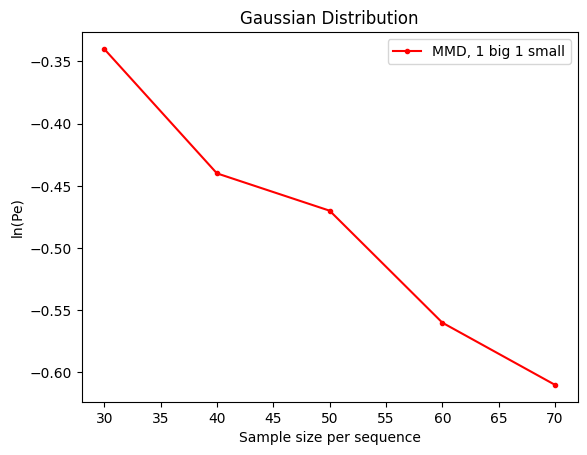

In [ ]:
import matplotlib.pyplot as plt
x = [30,40,50,60,70]
y1 = [-0.34,-0.44,-0.47,-0.56,-0.61]
plt.plot(x, y1, '.r-', label = "MMD, 1 big 1 small")
plt.xlabel('Sample size per sequence')
plt.ylabel('ln(Pe)')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()